In [171]:
#Portfolio Risk Management and Optimization using Statistical analysis In Python
#Jupyter Notebook, Python 3, Statistics, Python Packages – Numpy, Pandas, Matplotlib
#•	Used Modern Portfolio Theory
#•	10 Stocks considered – L&T, Infosys, HDFC, HUL, Asian Paint, ITC, Britannia, Reliance, TCS and Bajaj Finance
#•	Considered stock data from 1-1-2010 till date
#•	Individual Stock Analysis - Daily Returns, Covariance & Correlation
#•	Portfolio Analysis – Mean, Variance & Volatility
#•	Performed Monte Carlo Simulation (10,000 random weight combinations)
#•	Plotted Efficient Frontier
#•	Optimized based on Sharpe Ratio

In [172]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [173]:
tickers = ['LT.NS','INFY.NS','HDFCBANK.NS','HINDUNILVR.NS','ASIANPAINT.NS','ITC.NS','BRITANNIA.NS','RELIANCE.NS','TCS.NS','BAJFINANCE.NS']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='01/01/2010')['Adj Close']

In [174]:
data.tail()

,LT.NS,INFY.NS,HDFCBANK.NS,HINDUNILVR.NS,ASIANPAINT.NS,ITC.NS,BRITANNIA.NS,RELIANCE.NS,TCS.NS,BAJFINANCE.NS
Date,,,,,,,,,,
2020-06-29,936.599976,731.750000,1076.050049,2182.949951,1691.949951,197.250000,3519.250000,1716.704102,2101.649902,2857.949951
2020-06-30,943.650024,735.950012,1065.849976,2180.000000,1687.449951,194.649994,3603.800049,1697.725342,2082.149902,2831.000000
2020-07-01,924.299988,731.900024,1084.599976,2170.399902,1688.000000,202.899994,3545.949951,1731.099976,2092.050049,2953.899902
2020-07-02,941.299988,756.599976,1089.400024,2151.750000,1686.449951,205.850006,3535.100098,1760.349976,2157.149902,2964.250000
2020-07-03,944.250000,762.700012,1073.949951,2173.699951,1695.650024,207.550003,3538.350098,1787.900024,2199.649902,2931.500000


<p><b> Graphical Representation of Daily Stock Prices :</b></p>

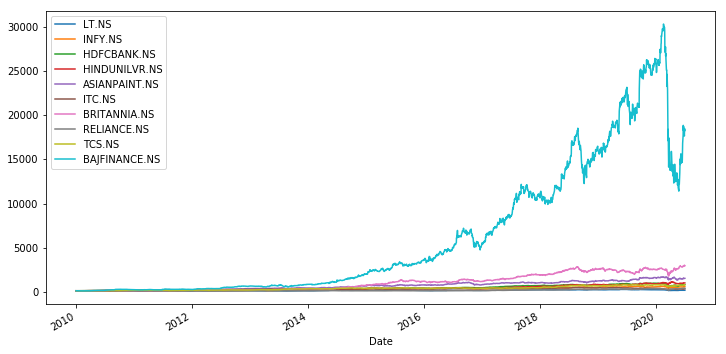

In [175]:
(data/data.iloc[0] * 100).plot(figsize = (12,6))

<p><b> Individual Security Returns & Risk : </b></p>

In [176]:
daily_returns = np.log(data/data.shift(1))
daily_returns

,LT.NS,INFY.NS,HDFCBANK.NS,HINDUNILVR.NS,ASIANPAINT.NS,ITC.NS,BRITANNIA.NS,RELIANCE.NS,TCS.NS,BAJFINANCE.NS
Date,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001773,0.003344,0.000879,-0.003216,0.003154,0.009807,0.001497,-0.004473,0.000266,-0.006724
2010-01-06,-0.011129,-0.014698,0.000674,0.005669,-0.003014,0.002340,-0.009138,0.016028,-0.022871,0.014276
2010-01-07,-0.004815,-0.022732,0.002601,-0.002075,-0.010254,-0.003120,-0.004115,0.016454,-0.028223,-0.006095
2010-01-08,0.006305,-0.024393,0.001313,0.004334,0.016384,0.002146,0.002211,-0.002625,-0.020649,0.018028
2010-01-11,-0.000506,0.010274,-0.004031,0.000564,-0.001696,0.000389,-0.000242,-0.019821,0.020369,0.024981
2010-01-12,0.001161,0.038339,-0.007610,-0.014956,0.025766,-0.025857,0.008497,0.002632,0.048977,-0.038362
2010-01-13,-0.003610,0.036643,-0.003487,0.001334,0.007834,-0.004409,-0.003637,0.003912,0.050056,-0.054165
2010-01-14,-0.002872,0.002325,-0.003261,-0.024878,0.012541,-0.003218,0.011914,0.029953,-0.011094,0.026406


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CACAAE0860>,
      dtype=object)

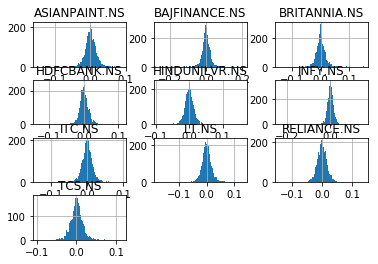

In [177]:
daily_returns.hist(bins=100)

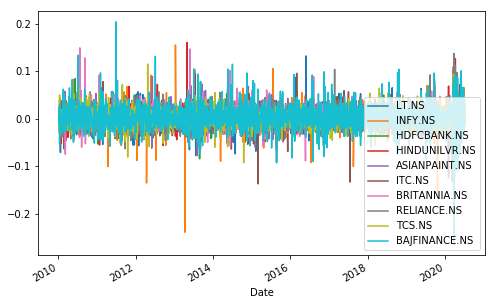

In [178]:
daily_returns.plot(figsize = (8,5))

In [179]:
annual_returns = daily_returns.mean() * 252
annual_returns

LT.NS            0.042974
INFY.NS          0.171014
HDFCBANK.NS      0.202714
HINDUNILVR.NS    0.223342
ASIANPAINT.NS    0.264322
ITC.NS           0.112691
BRITANNIA.NS     0.329842
RELIANCE.NS      0.132916
TCS.NS           0.201015
BAJFINANCE.NS    0.507774
dtype: float64

In [180]:
covar = daily_returns.cov() * 252
covar

,LT.NS,INFY.NS,HDFCBANK.NS,HINDUNILVR.NS,ASIANPAINT.NS,ITC.NS,BRITANNIA.NS,RELIANCE.NS,TCS.NS,BAJFINANCE.NS
LT.NS,0.089012,0.019254,0.036520,0.016410,0.025872,0.020883,0.021695,0.035628,0.015248,0.041201
INFY.NS,0.019254,0.083836,0.017338,0.011590,0.011023,0.011509,0.011868,0.019372,0.038159,0.017911
HDFCBANK.NS,0.036520,0.017338,0.055663,0.015731,0.020601,0.020263,0.015867,0.029989,0.015753,0.035174
HINDUNILVR.NS,0.016410,0.011590,0.015731,0.059683,0.017732,0.016612,0.020815,0.017922,0.011841,0.020600
ASIANPAINT.NS,0.025872,0.011023,0.020601,0.017732,0.068285,0.015045,0.018565,0.022744,0.010717,0.026671
ITC.NS,0.020883,0.011509,0.020263,0.016612,0.015045,0.067392,0.011326,0.017806,0.014154,0.022500
BRITANNIA.NS,0.021695,0.011868,0.015867,0.020815,0.018565,0.011326,0.075510,0.018967,0.011554,0.026043
RELIANCE.NS,0.035628,0.019372,0.029989,0.017922,0.022744,0.017806,0.018967,0.081324,0.019616,0.034309
TCS.NS,0.015248,0.038159,0.015753,0.011841,0.010717,0.014154,0.011554,0.019616,0.067915,0.015656
BAJFINANCE.NS,0.041201,0.017911,0.035174,0.020600,0.026671,0.022500,0.026043,0.034309,0.015656,0.147218


In [181]:
corr = daily_returns.corr()
corr

,LT.NS,INFY.NS,HDFCBANK.NS,HINDUNILVR.NS,ASIANPAINT.NS,ITC.NS,BRITANNIA.NS,RELIANCE.NS,TCS.NS,BAJFINANCE.NS
LT.NS,1.000000,0.222890,0.518821,0.225140,0.331854,0.269628,0.264622,0.418755,0.196110,0.359915
INFY.NS,0.222890,1.000000,0.253798,0.163842,0.145684,0.153116,0.149164,0.234616,0.505702,0.161221
HDFCBANK.NS,0.518821,0.253798,1.000000,0.272935,0.334152,0.330844,0.244741,0.445724,0.256210,0.388563
HINDUNILVR.NS,0.225140,0.163842,0.272935,1.000000,0.277765,0.261943,0.310068,0.257254,0.185991,0.219767
ASIANPAINT.NS,0.331854,0.145684,0.334152,0.277765,1.000000,0.221786,0.258541,0.305211,0.157369,0.266008
ITC.NS,0.269628,0.153116,0.330844,0.261943,0.221786,1.000000,0.158769,0.240518,0.209219,0.225893
BRITANNIA.NS,0.264622,0.149164,0.244741,0.310068,0.258541,0.158769,1.000000,0.242046,0.161337,0.247002
RELIANCE.NS,0.418755,0.234616,0.445724,0.257254,0.305211,0.240518,0.242046,1.000000,0.263949,0.313560
TCS.NS,0.196110,0.505702,0.256210,0.185991,0.157369,0.209219,0.161337,0.263949,1.000000,0.156568
BAJFINANCE.NS,0.359915,0.161221,0.388563,0.219767,0.266008,0.225893,0.247002,0.313560,0.156568,1.000000


<p><b>Portfolio Analysis (assigning random weights to the stocks) :</b></p>

In [182]:
weights = np.random.random(len(tickers))
weights /= np.sum(weights)
weights

array([0.020706  , 0.15279778, 0.10669351, 0.0859814 , 0.0927374 ,
       0.11805242, 0.00772287, 0.11236859, 0.16237382, 0.14056621])

<p><b> Expected Portfolio Return : </b></p>

In [183]:
np.dot(annual_returns, weights)

0.22716635200600516

<p><b> Expected Portfolio Variance : </b></p>

In [184]:
np.dot(weights.T, np.dot(covar, weights))

0.027978049959820853

<p><b> Expected Portfolio Volatility : </b></p>

In [185]:
np.sqrt(np.dot(weights.T, np.dot(covar, weights)))

0.16726640415762173

<p><b>Monte-Carlo Simulation (generating 10,000 weight combinations) :</b></p>

In [186]:
pfolio_returns = []
pfolio_volatilities = []
sharpe_ratio = []
stock_weights = []

In [187]:
for x in range(10000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    pfolio_returns.append(np.dot(daily_returns.mean()*252, weights))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov()*252, weights))))
    sharpe_ratio.append(np.dot(annual_returns, weights)/np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov()*252, weights))))
    stock_weights.append(weights)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
sharpe_ratio = np.array(sharpe_ratio)
stock_weights = np.array(stock_weights)

pfolio_returns, pfolio_volatilities, sharpe_ratio, stock_weights

(array([0.22174011, 0.21212594, 0.2121493 , ..., 0.19993011, 0.20489858,
        0.19757483]),
 array([0.16444897, 0.18228759, 0.16355741, ..., 0.16282931, 0.17049781,
        0.16259419]),
 array([1.34838249, 1.16368827, 1.29709376, ..., 1.22785085, 1.20176666,
        1.21514073]),
 array([[0.08755946, 0.18712652, 0.08982639, ..., 0.01370183, 0.11302064,
         0.12452231],
        [0.19391565, 0.01615113, 0.0426802 , ..., 0.1509148 , 0.11572661,
         0.13955512],
        [0.07385384, 0.00259773, 0.0103991 , ..., 0.16891896, 0.14455751,
         0.08982688],
        ...,
        [0.05714345, 0.08130787, 0.16348061, ..., 0.16813119, 0.19448047,
         0.03543093],
        [0.0330052 , 0.11197897, 0.08489395, ..., 0.20510379, 0.03159463,
         0.11546052],
        [0.1398836 , 0.1360314 , 0.06884535, ..., 0.07712083, 0.10753138,
         0.08285568]]))

In [188]:
portfolios = pd.DataFrame({'Return' : pfolio_returns,'Volatility' : pfolio_volatilities,'Sharpe Ratio' : sharpe_ratio})

In [189]:
for counter,symbol in enumerate(tickers):
    portfolios[symbol] = [weights[counter] for weights in stock_weights]

In [190]:
portfolios.head()

,Return,Volatility,Sharpe Ratio,LT.NS,INFY.NS,HDFCBANK.NS,HINDUNILVR.NS,ASIANPAINT.NS,ITC.NS,BRITANNIA.NS,RELIANCE.NS,TCS.NS,BAJFINANCE.NS
0,0.221740,0.164449,1.348382,0.087559,0.187127,0.089826,0.183228,0.040362,0.113209,0.047444,0.013702,0.113021,0.124522
1,0.212126,0.182288,1.163688,0.193916,0.016151,0.042680,0.023360,0.235304,0.075503,0.006890,0.150915,0.115727,0.139555
2,0.212149,0.163557,1.297094,0.073854,0.002598,0.010399,0.121551,0.088374,0.184812,0.115109,0.168919,0.144558,0.089827
3,0.188223,0.164722,1.142673,0.137937,0.135357,0.068311,0.157284,0.072889,0.078834,0.015850,0.145329,0.124170,0.064039
4,0.222604,0.163466,1.361777,0.124608,0.015326,0.140931,0.060177,0.061161,0.128667,0.174994,0.030115,0.175486,0.088534


In [191]:
max_sharpe = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]
max_sharpe

Return           0.303113
Volatility       0.177425
Sharpe Ratio     1.708396
LT.NS            0.001737
INFY.NS          0.044296
HDFCBANK.NS      0.096723
HINDUNILVR.NS    0.063731
ASIANPAINT.NS    0.141953
ITC.NS           0.000878
BRITANNIA.NS     0.211645
RELIANCE.NS      0.007793
TCS.NS           0.214560
BAJFINANCE.NS    0.216684
Name: 359, dtype: float64

Text(0.5, 1.0, 'Efficient Frontier')

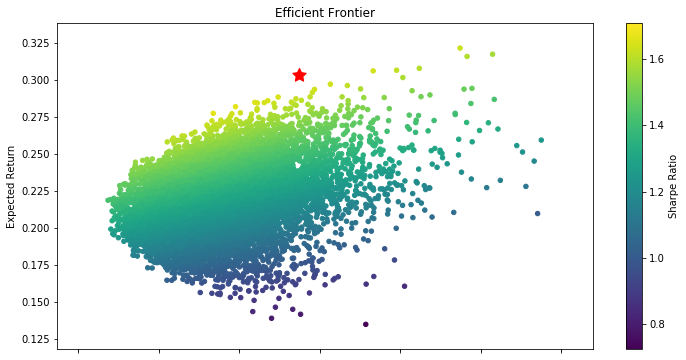

In [195]:
portfolios.plot.scatter(x = 'Volatility', y = 'Return', c = 'Sharpe Ratio', cmap= 'viridis', figsize = (12,6));
plt.scatter(max_sharpe[1], max_sharpe[0], marker=(5,1,0), color='r', s = 200)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

In [196]:
max_sharpe.to_frame().T

,Return,Volatility,Sharpe Ratio,LT.NS,INFY.NS,HDFCBANK.NS,HINDUNILVR.NS,ASIANPAINT.NS,ITC.NS,BRITANNIA.NS,RELIANCE.NS,TCS.NS,BAJFINANCE.NS
359,0.303113,0.177425,1.708396,0.001737,0.044296,0.096723,0.063731,0.141953,0.000878,0.211645,0.007793,0.21456,0.216684
